In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [4]:
def graph_classes(x,y):
    fig = plt.figure(figsize=(8,8))
    for n in set(y):
        plt.scatter(x[y==n,0],x[y==n,1])

In [16]:
X, y = make_blobs(n_samples=100, n_features=2,centers=3,random_state=1,cluster_std=2)

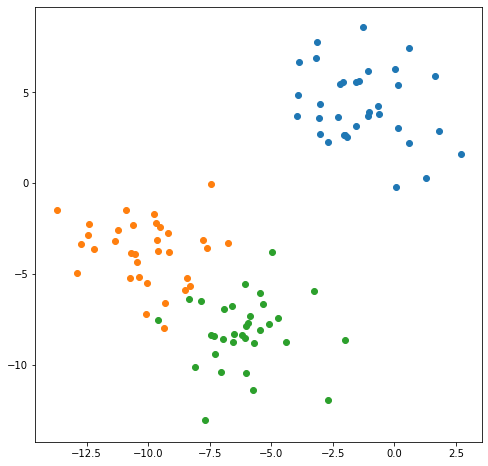

In [17]:
graph_classes(X,y)

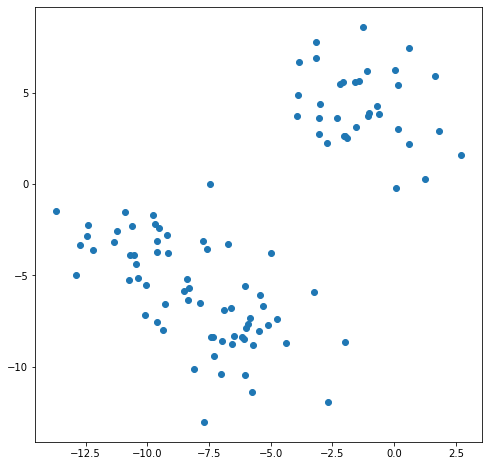

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])

In [21]:
def generate_random_centroid(X):
    x_range = [min(X[:,0]),max(X[:,0])]
    y_range = [min(X[:,1]),max(X[:,1])]
    
    centroid_x = np.random.uniform(x_range[0],x_range[1],1)[0]
    centroid_y = np.random.uniform(y_range[0],y_range[1],1)[0]
    return (centroid_x, centroid_y)

In [23]:
generate_random_centroid(X)

(-4.075651661464063, -10.157125676686768)

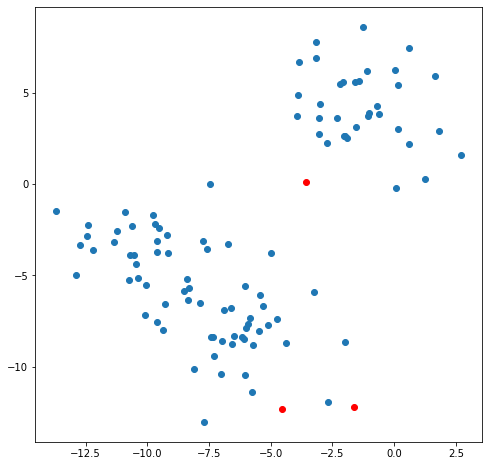

In [31]:
c1 = generate_random_centroid(X)
c2 = generate_random_centroid(X)
c3 = generate_random_centroid(X)

plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(c1[0], c1[1],c='r')
plt.scatter(c2[0], c2[1],c='r')
plt.scatter(c3[0], c3[1],c='r')

In [53]:
def nearest_centroid(point, centroids):
    distances = []
    for centroid in centroids:
        distances.append((point[0]-centroid[0])**2+(point[1]-centroid[1])**2)
    return np.argmin(distances)

def assign_to_centroid(X,centroids):
    assignments = []
    
    for n in range(0,len(X)):
        assignments.append(nearest_centroid(X[n],centroids))
    return np.array(assignments)

In [54]:
centroids = [c1,c2,c3]
assignments = assign_to_centroid(X,centroids)

In [83]:
def plot_with_centroid_assignments(X,centroids):
    colors = ['b','r','g','purple','orange','yellow']
    assignments = assign_to_centroid(X,centroids)
    
    for n in range(0,len(centroids)):
        plt.scatter(X[assignments==n,0],X[assignments==n,1],c=colors[n])
        plt.scatter(centroids[n][0],centroids[n][1], marker='*',edgecolors=colors[n],s=100)

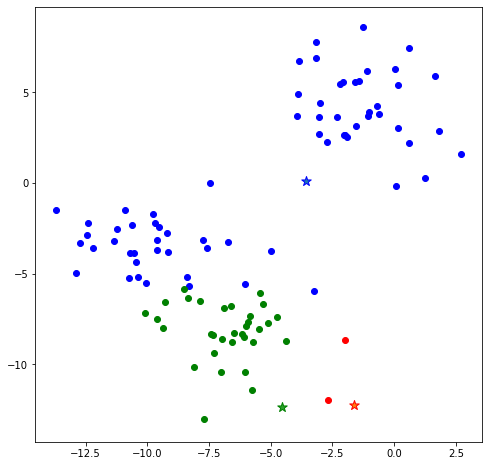

In [84]:
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids)

In [91]:
def move_centroids(X,centroids):
    assignments = assign_to_centroid(X,centroids)
    new_centroids = []
    for n in range(0,len(set(assignments))):
        new_centroid_x = np.mean(X[assignments==n,0])
        new_centroid_y = np.mean(X[assignments==n,1])
        new_centroids.append((new_centroid_x,new_centroid_y))
    return new_centroids

In [94]:
centroids_2 = move_centroids(X,centroids)

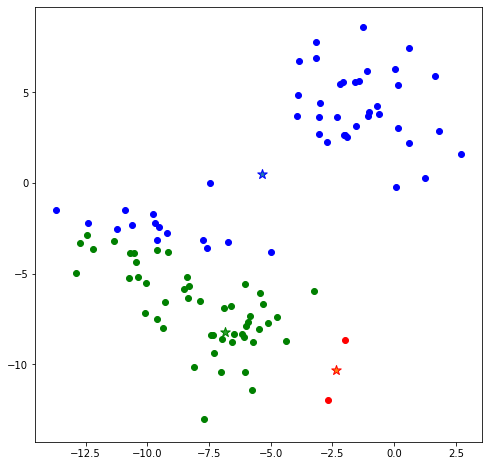

In [95]:
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_2)

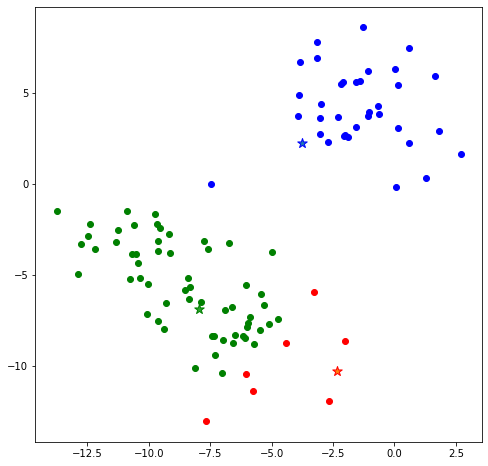

In [96]:
centroids_3 = move_centroids(X,centroids_2)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_3)

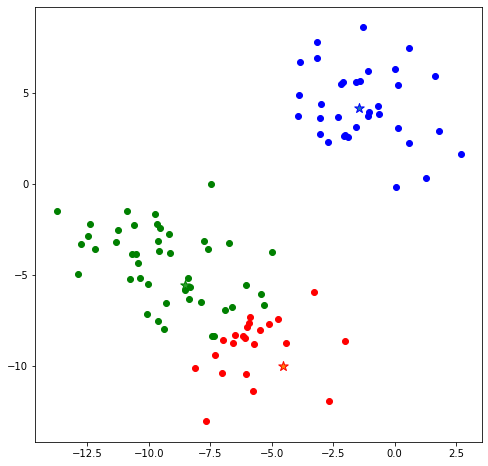

In [97]:
centroids_4 = move_centroids(X,centroids_3)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_4)

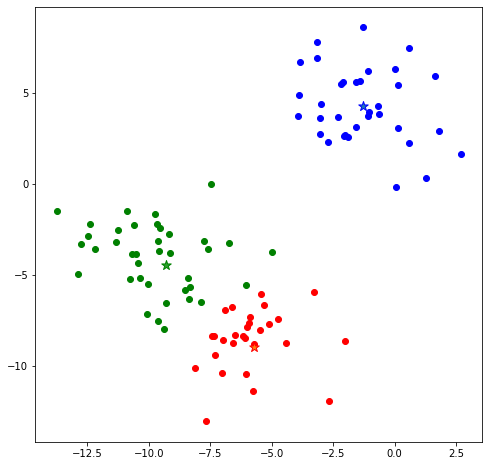

In [98]:
centroids_5 = move_centroids(X,centroids_4)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_5)

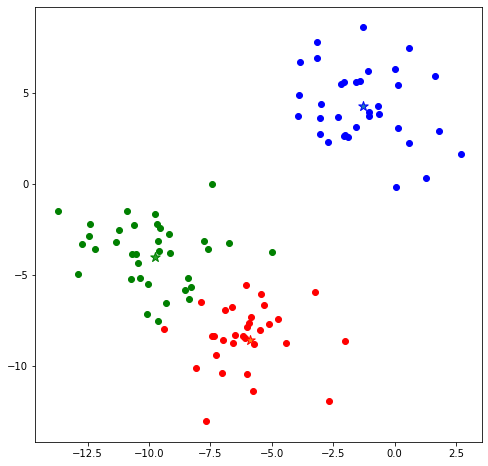

In [99]:
centroids_6 = move_centroids(X,centroids_5)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_6)

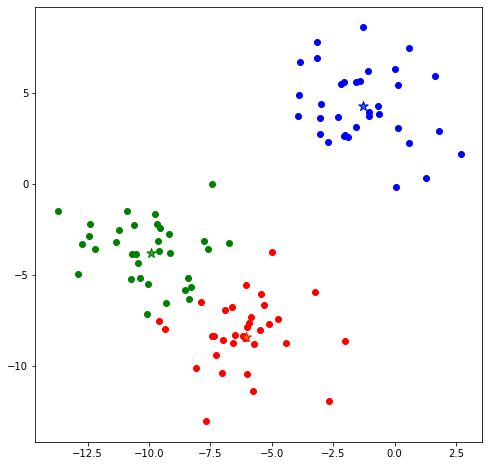

In [100]:
centroids_7 = move_centroids(X,centroids_6)
plt.figure(figsize=(8,8))
plot_with_centroid_assignments(X,centroids_7)
centroids_8 = move_centroids(X,centroids_7)

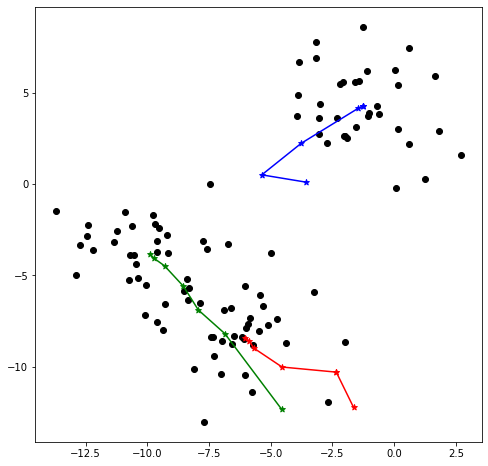

In [109]:
centroid_list = [centroids, centroids_2, centroids_3, centroids_4, centroids_5, centroids_6, centroids_7]
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c='k')
plt.plot([centroid[0][0] for centroid in centroid_list],[centroid[0][1]for centroid in centroid_list],c='b')
plt.plot([centroid[1][0] for centroid in centroid_list],[centroid[1][1]for centroid in centroid_list],c='r')
plt.plot([centroid[2][0] for centroid in centroid_list],[centroid[2][1]for centroid in centroid_list],c='g')

plt.scatter([centroid[0][0] for centroid in centroid_list],[centroid[0][1]for centroid in centroid_list],c='b'
            ,marker='*')
plt.scatter([centroid[1][0] for centroid in centroid_list],[centroid[1][1]for centroid in centroid_list],c='r'
            ,marker='*')
plt.scatter([centroid[2][0] for centroid in centroid_list],[centroid[2][1]for centroid in centroid_list],c='g'
           ,marker='*')

In [176]:
def k_means_visuals(X,k,n_steps):
    c_0 = []
    for n in range(0,k):
        c_0.append(generate_random_centroid(X))
    
    master_centroids = [c_0]
    
        
    for n in range(0,n_steps):
        new_centroids = move_centroids(X,master_centroids[-1])
        master_centroids.append(new_centroids)
    
    indexes_to_map = [0,2,3,n_steps-1]
    colors = ['b','r','g','purple','orange','yellow','k']
    
    fig, axes = plt.subplots(figsize=(10,10),nrows = 2, ncols=2)
    for n in range(0,4):
        row = n//2
        column = (n)%2
        centroids = master_centroids[indexes_to_map[n]]
        assignments = assign_to_centroid(X,centroids)
        
        ax = axes[row][column]
        for i in range(0,k):
            ax.scatter(X[assignments==i,0],X[assignments==i,1],c=colors[i])
            ax.scatter(centroids[i][0],centroids[i][1], marker='*',edgecolors=colors[i],s=100)
            ax.plot([centroid[i][0] for centroid in master_centroids[:indexes_to_map[n]+1]],
                    [centroid[i][1]for centroid in master_centroids[:indexes_to_map[n]+1]],c=colors[i])
            
        if n == 0:
            ax.set_title('Initial centroid placement')
        elif n==3:
            ax.set_title(f'Final centroid placement')
        else:
            ax.set_title(f'Centroid placement after {indexes_to_map[n]} steps')


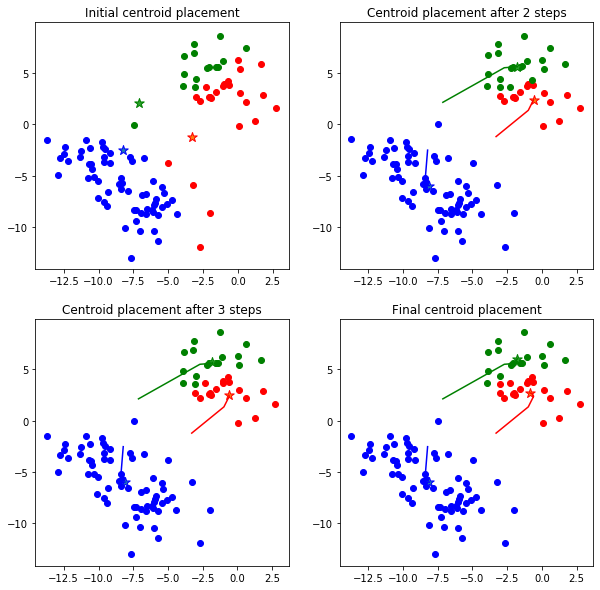

In [341]:
k_means_visuals(X,3,10)

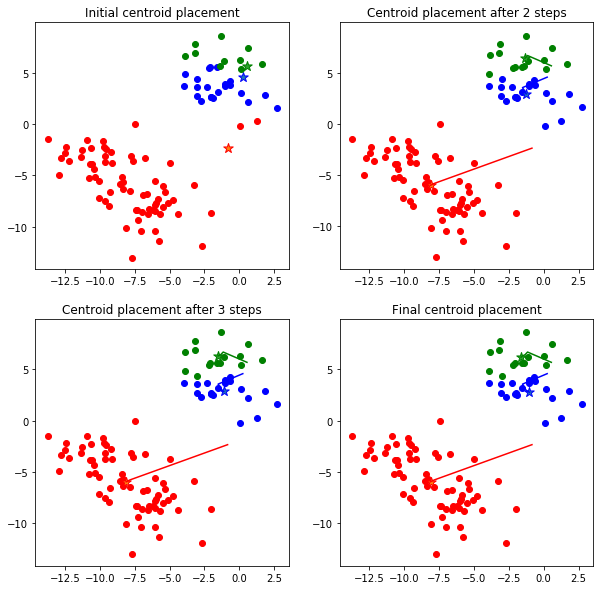

In [342]:
k_means_visuals(X,3,10)

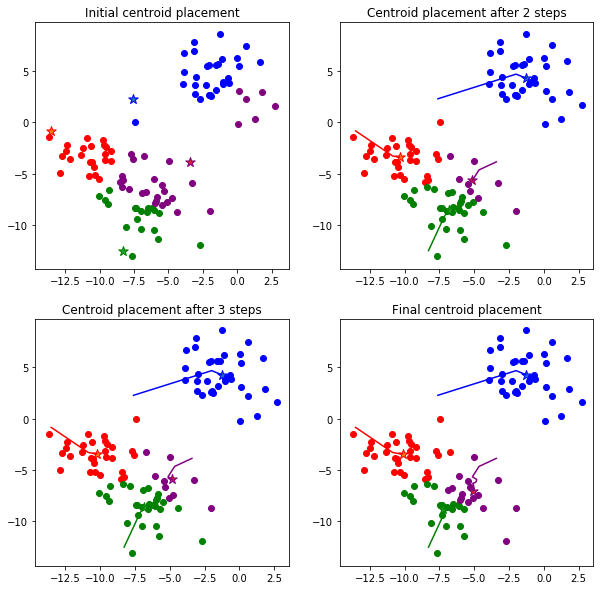

In [343]:
k_means_visuals(X,4,10)

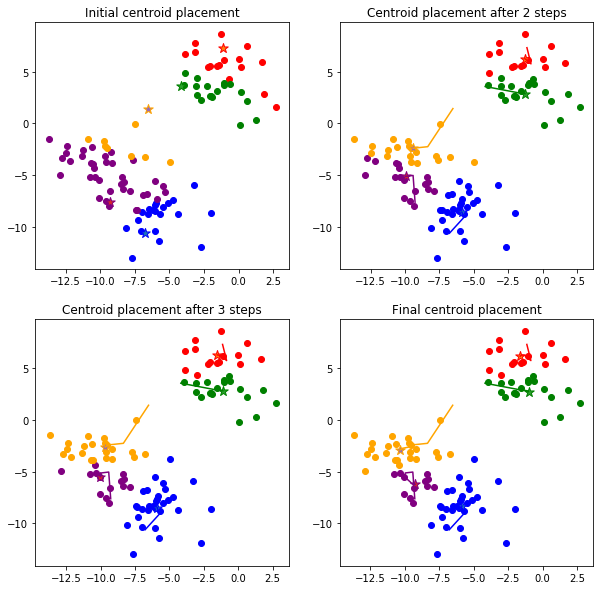

In [345]:
k_means_visuals(X,5,10)

In [185]:
X_2, y_2 = make_blobs(n_samples=100, n_features=2,centers=4,random_state=1,cluster_std=2.5)

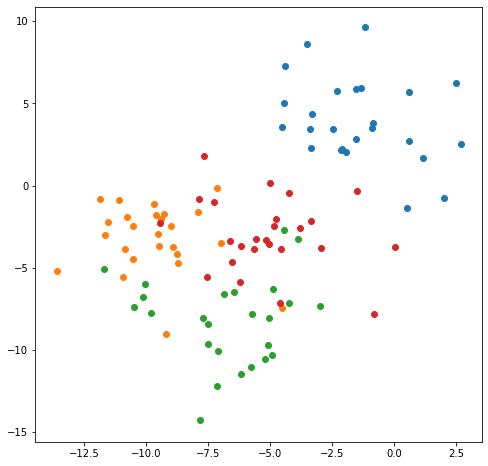

In [186]:
graph_classes(X_2,y_2)

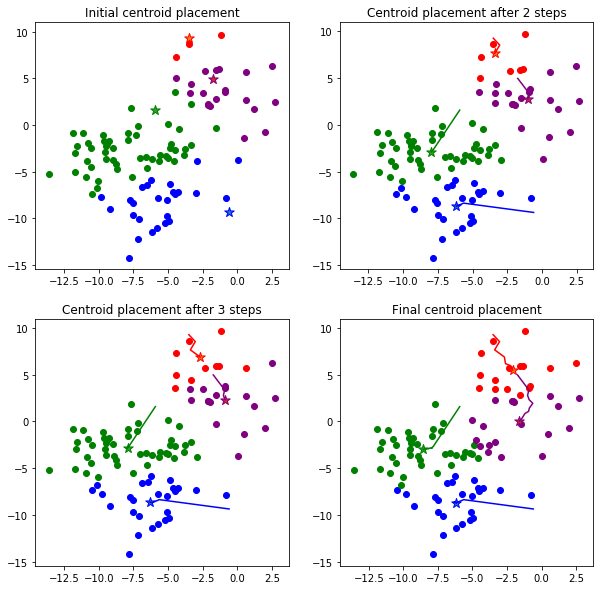

In [187]:
k_means_visuals(X_2,4,10)

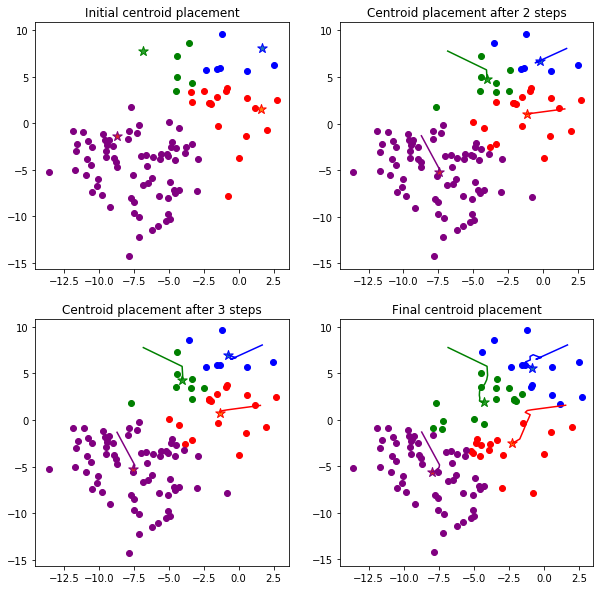

In [190]:
k_means_visuals(X_2,4,12)

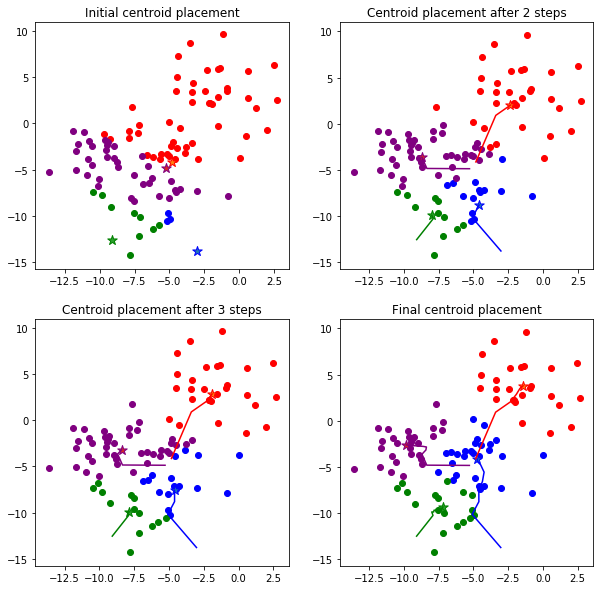

In [188]:
k_means_visuals(X_2,4,10)

K-means is essentially a top down approach. It groups everything at once, and then tweaks the groupings until it's happy.

Another approach might be bottom up, slowly grouping things together one by one until you have the maximum number of groups you want. This is agglomerative hierarchical grouping.

In [274]:
def cluster_distance(cluster_1,cluster_2):
        
    distances = []
    for x in cluster_1:
        for y in cluster_2:
            distances.append((x[0]-y[0])**2 + (x[1]-y[1])**2)
    return np.mean(distances)

def alt_cluster_distance(cluster_1,cluster_2):
    x = (np.mean(cluster_1[:,0])-np.mean(cluster_2[:,0]))**2
    y = (np.mean(cluster_1[:,1])-np.mean(cluster_2[:,1]))**2
    return  x+y 


In [302]:
def identify_clusters_to_merge(X,cluster_list):
    distance_to_beat = 1000
    clusters_to_replace = []
  
    cluster_ref = list(set(cluster_list))
    for n in range(0,len(cluster_ref)):
        for i in range(n+1,len(cluster_ref)):
            distance = cluster_distance(X[cluster_list==cluster_ref[n]],X[cluster_list==cluster_ref[i]])
            if distance < distance_to_beat:
                distance_to_beat = distance
                clusters_to_replace = [cluster_ref[n],cluster_ref[i]]
    return clusters_to_replace

In [232]:
cluster_list = np.array(range(0,100))

In [233]:
identify_clusters_to_merge(X,cluster_list)

[33, 68]

In [306]:
def agglomerative_clustering(X,n_clusters):
    cluster_list = np.array(range(0,len(X)))

    while len(set(cluster_list)) > n_clusters:
        clusters_to_replace = identify_clusters_to_merge(X,cluster_list)
        cluster_list[cluster_list == clusters_to_replace[1]] = clusters_to_replace[0]

    return cluster_list

In [314]:
Z,z = make_blobs(n_samples=50)

In [317]:
clusters = agglomerative_clustering(Z,8)

In [308]:
from sklearn.neighbors import KernelDensity

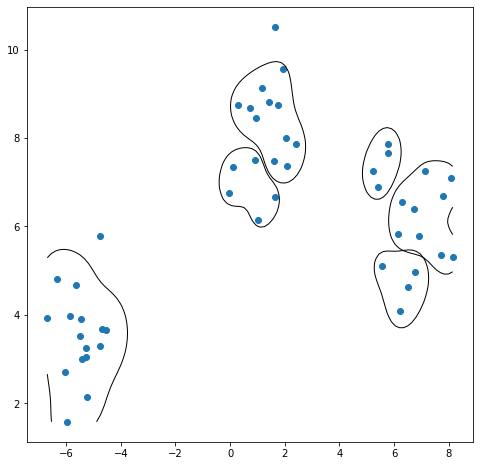

In [320]:
plt.figure(figsize=(8,8))
plt.scatter(Z[:,0],Z[:,1])
x_min = min(Z[:,0])
x_max = max(Z[:,0])
y_min = min(Z[:,1])
y_max = max(Z[:,1])
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

for cluster in set(clusters):
    if len(Z[clusters==cluster])>1:
        points = Z[clusters==cluster]
        other_points = Z[clusters!=cluster]
    
        kde = KernelDensity(bandwidth=.5).fit(points)
        scores = kde.score_samples(gridpoints)
        score_inside = np.min(kde.score_samples(points))
        score_outside = np.max(kde.score_samples(other_points))
        levels = .8 * score_inside + .2 * score_outside
        plt.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=1)

In [353]:
def graph_agglomerative_clusters(X,clusters,ax):
    ax.scatter(X[:,0],X[:,1])
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]
    
    for cluster in set(clusters):
        if len(X[clusters==cluster])>1:
            points = X[clusters==cluster]
            other_points = X[clusters!=cluster]
    
            kde = KernelDensity(bandwidth=1).fit(points)
            scores = kde.score_samples(gridpoints)
            score_inside = np.min(kde.score_samples(points))
            score_outside = np.max(kde.score_samples(other_points))
            levels = .8 * score_inside + .2 * score_outside
            ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                        colors='k', linestyles='solid', linewidths=1)

In [334]:
def graph_whole_agg_process(X,n_clusters):
    stops = [0,(2*(len(X)-n_clusters))//3,(len(X)-n_clusters)//3,n_clusters]
    
    fig, axes = plt.subplots(figsize=(10,10),nrows = 2, ncols=2)
    
    for n in range(0,4):
        row = n//2
        column = (n)%2
        ax = axes[row][column]
        if n==0:
            ax.scatter(X[:,0],X[:,1])
            ax.set_title(f'{len(X)} clusters - i.e. individual points')
        else:
            clusters = agglomerative_clustering(X,stops[n])
            graph_agglomerative_clusters(X,clusters,ax)
            ax.set_title(f'With {stops[n]} clusters')
            

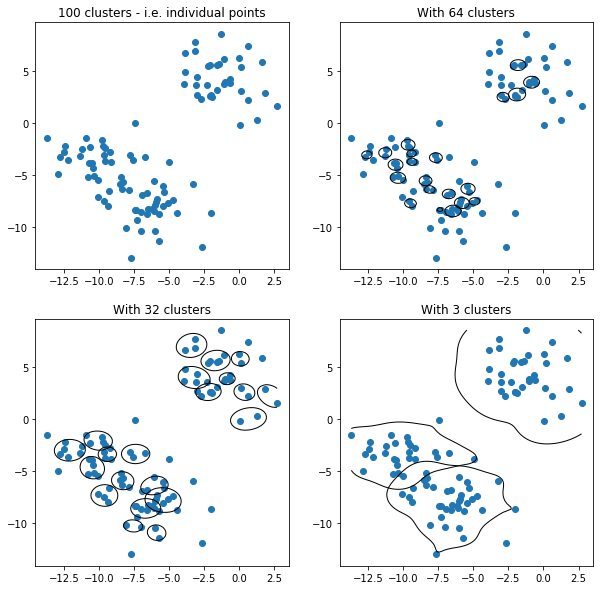

In [354]:
graph_whole_agg_process(X,3)

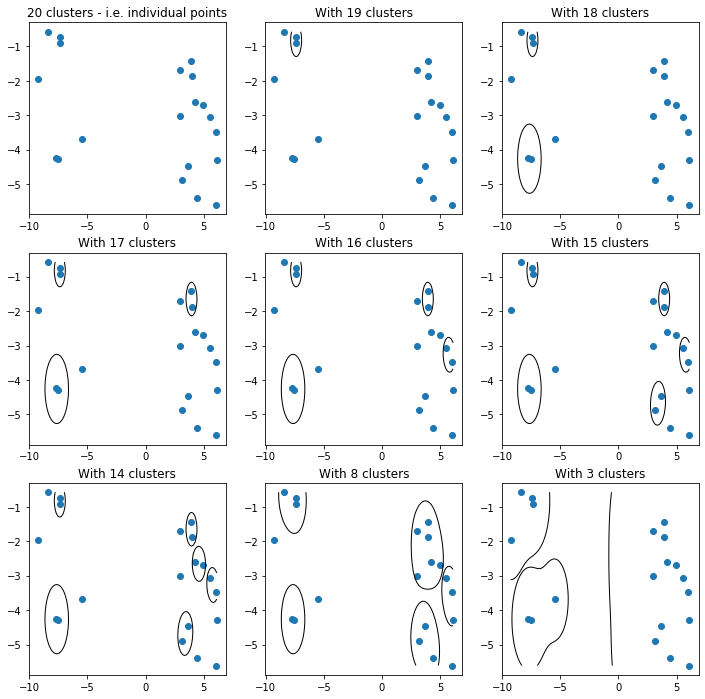

In [337]:
Z, z = make_blobs(n_samples=20)
stops = [0,1,2,3,4,5,6,12,17]
fig, axes = plt.subplots(figsize=(12,12),nrows = 3, ncols=3)
    
for n in range(0,9):
    row = n//3
    column = (n)%3
    ax = axes[row][column]
    if n==0:
        ax.scatter(Z[:,0],Z[:,1])
        ax.set_title(f'{len(Z)} clusters - i.e. individual points')
    else:
        clusters = agglomerative_clustering(Z,len(Z)-stops[n])
        graph_agglomerative_clusters(Z,clusters,ax)
        ax.set_title(f'With {len(Z)-stops[n]} clusters')

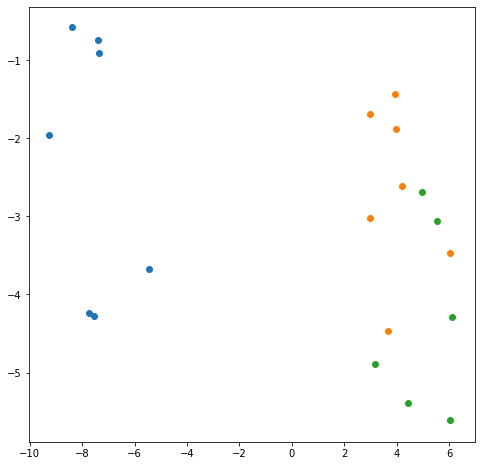

In [338]:
graph_classes(Z,z)

In [362]:
X_3, y_3 = make_blobs(n_samples=100,centers=4)

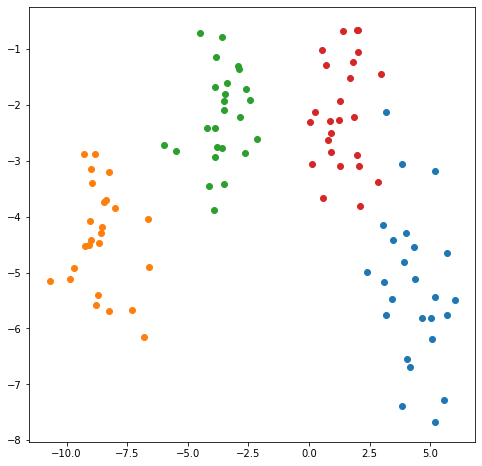

In [364]:
graph_classes(X_3,y_3)

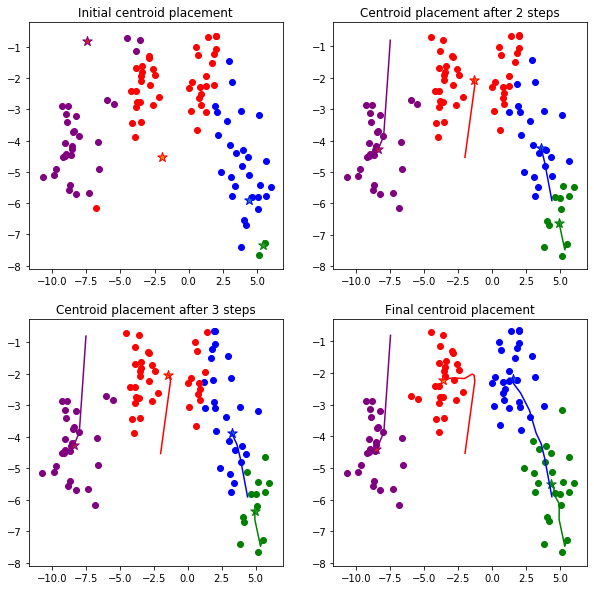

In [363]:
k_means_visuals(X_3,4,10)

In [366]:
from sklearn.cluster import KMeans

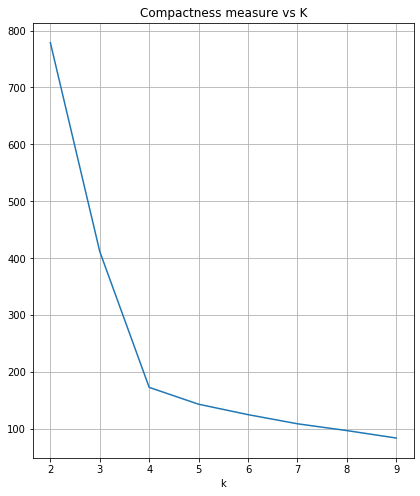

In [368]:
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X_3)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Compactness measure vs K')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

In [378]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

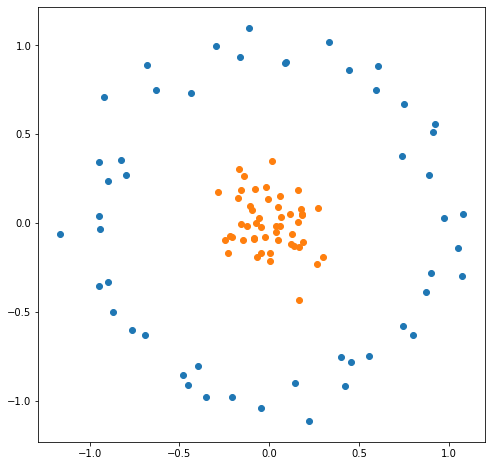

In [376]:
X_c, y_c = make_circles(noise=.1,factor=.15)
graph_classes(X_c,y_c)

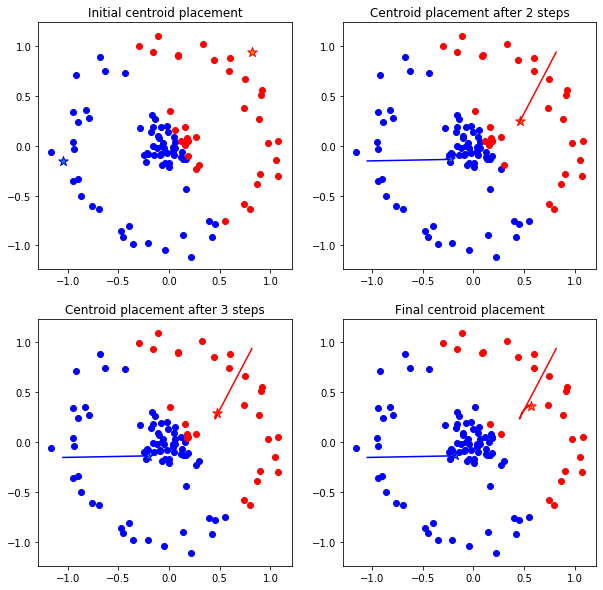

In [377]:
k_means_visuals(X_c,2,10)

In [379]:
agg = AgglomerativeClustering(linkage='single')
agg.fit(X_c)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2,
            pooling_func='deprecated')

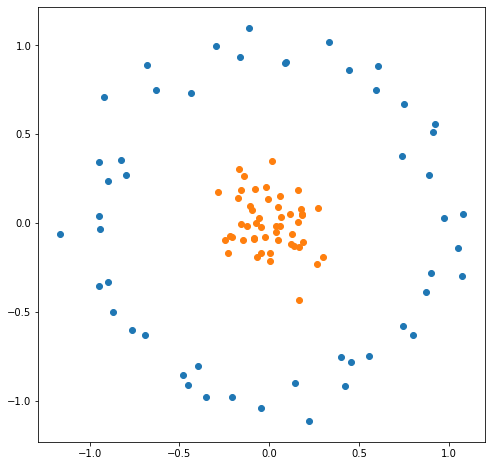

In [381]:
graph_classes(X_c,agg.labels_)

In [384]:
def stepwise_agg_single(X,n_clusters):
    stops = [0,(2*(len(X)-n_clusters))//3,(len(X)-n_clusters)//3,n_clusters]
    
    fig, axes = plt.subplots(figsize=(10,10),nrows = 2, ncols=2)
    
    for n in range(0,4):
        row = n//2
        column = (n)%2
        ax = axes[row][column]
        if n==0:
            ax.scatter(X[:,0],X[:,1])
            ax.set_title(f'{len(X)} clusters - i.e. individual points')
        else:
            agg = AgglomerativeClustering(n_clusters=stops[n],linkage='single')
            agg.fit(X)
            clusters = agg.labels_
            graph_agglomerative_clusters(X,clusters,ax)
            ax.set_title(f'With {stops[n]} clusters')

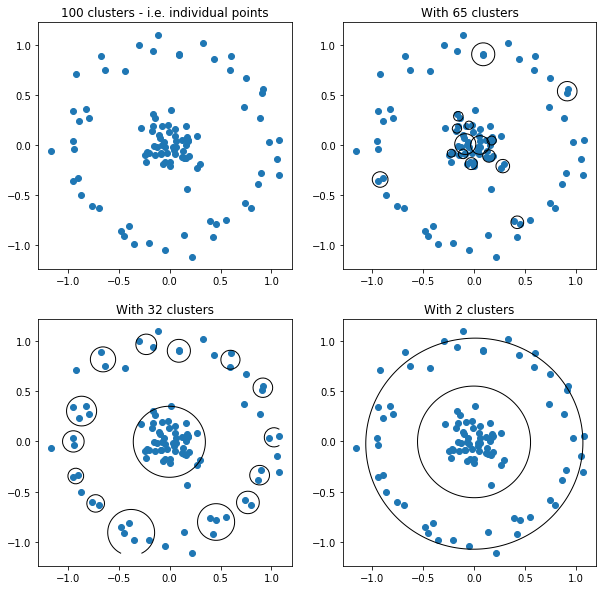

In [385]:
stepwise_agg_single(X_c,2)